# Exploratory Data Analysis

## Understanding and Cleaning Dataset

In [89]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [90]:
# Load in data
data = pd.read_csv('../data/final_data_cleaned.csv')
data.head()

,record_id,redcap_event_name,sex_dashboard,age,age_group,acl_rsi,lsi_ext_isok_60,lsi_flex_isok_60,sh_lsi,visit_num
0,1,visit_1_arm_1,Male,21.7,5.0,87.5,87.86,103.32,97.68,1
1,2,visit_1_arm_1,Female,14.5,2.0,8.3,45.00,72.98,75.38,1
2,3,visit_1_arm_1,Female,14.0,2.0,94.2,81.53,81.11,95.20,1
3,4,visit_1_arm_1,Female,17.6,3.0,NaN,61.56,64.21,94.49,1
4,4,visit_2_arm_1,Female,18.2,4.0,76.7,76.20,81.86,96.54,2


In [91]:
# Let's see the shape.
data.shape

(2222, 10)

There are 2222 observations and 10 features.

In [92]:
# Let's understand the observations? Are there 2222 separate patients?
print(data['record_id'].nunique())
results1 = data['record_id'].value_counts().describe()

table = pd.DataFrame(results1) # this will show the results as a table format
display(table) 

1362


,count
count,1362.000000
mean,1.631424
std,1.306451
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,15.000000


We can see that there are 1362 unique patients, so this means that each patient may have multiple entries. Subjects have an average of 1.6 (rounded to 2) visits.

## Data Types

In [93]:
# Seeing what variables we are working with 
# This will show categorical variables
data.select_dtypes(include=['object', 'category', 'string']).head(n=3)

,redcap_event_name,sex_dashboard
0,visit_1_arm_1,Male
1,visit_1_arm_1,Female
2,visit_1_arm_1,Female


In [94]:
# This will which variables are numerical/continuous
data.select_dtypes(include=['int64', 'float64']).head(n=3)

,record_id,age,age_group,acl_rsi,lsi_ext_isok_60,lsi_flex_isok_60,sh_lsi,visit_num
0,1,21.7,5.0,87.5,87.86,103.32,97.68,1
1,2,14.5,2.0,8.3,45.00,72.98,75.38,1
2,3,14.0,2.0,94.2,81.53,81.11,95.20,1


## Descriptive Statistics & Distributions

#### Extension LSI and Flexion LSI

In [95]:
# Let's see the summary stats for knee extension lsi and knee flexion lsi, 
# this would show how symmetric the uninjured and injured limbs are when 
# extending and flexing the leg

table = pd.DataFrame(data['lsi_ext_isok_60'].describe())
display(table)

table = pd.DataFrame(data['lsi_flex_isok_60'].describe())
display(table)

data['lsi_flex_isok_60'].isnull().sum()

# It seems that patients generally seem to do better in flexion than extension, as the 
# mean is higher and the 75th percentile is also higher.

,lsi_ext_isok_60
count,2222.000000
mean,73.218780
std,22.299614
min,10.967185
25%,58.517500
50%,73.819601
75%,86.407500
max,247.370000


,lsi_flex_isok_60
count,2222.000000
mean,89.728019
std,18.970152
min,22.550000
25%,79.000000
50%,90.000000
75%,100.301858
max,311.110000


0

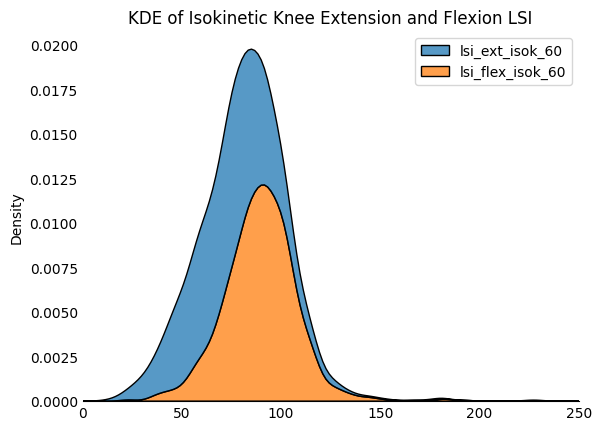

In [96]:
# This kde plot for both lsi extension and lsi flexion shows what 
# their basic distributions look like

d1 = data[['lsi_ext_isok_60', 'lsi_flex_isok_60']]
sns.kdeplot(d1, multiple='stack')
plt.title('KDE of Isokinetic Knee Extension and Flexion LSI')
plt.xlim(0, 250)
plt.tick_params(axis='y', which='both',length=0)
plt.tick_params(axis='x', which='both',length=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# There are less flexion measurements overall compared to extension, 
# and the flexion lsi values are slightly higher than extension lsi, 
# though they both have unimodal peaks

## Examine Correlations

(0.0, 200.0)

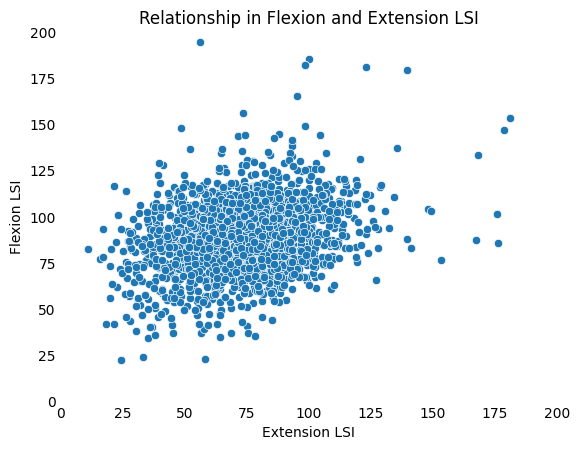

In [97]:
sns.scatterplot(data=data, x='lsi_ext_isok_60', y='lsi_flex_isok_60')
plt.title('Relationship in Flexion and Extension LSI')
plt.xlabel('Extension LSI')
plt.ylabel('Flexion LSI')
plt.tick_params(axis='y', which='both',length=0)
plt.tick_params(axis='x', which='both',length=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.ylim(0,200)
plt.xlim(0,200)

# By plotting the LSIs for flexion and extension, it may look like a blob at first, but 
# there seems to be a little bit of a positive correlation.
# This shows that perhaps Flexion and Extension LSIs tend to be similar for many patients.

#### Flexion LSI Over Time

In [98]:
data['visit_num'].value_counts()

visit_num
1    904
2    845
3    232
4     90
5     50
6     35
9     33
7     20
8     13
Name: count, dtype: int64

In [99]:
data['lsi_flex_isok_60'].groupby(data['visit_num']).mean()

visit_num
1    86.260421
2    91.778607
3    92.247613
4    93.090331
5    91.345113
6    90.966387
7    94.337597
8    93.832306
9    97.154199
Name: lsi_flex_isok_60, dtype: float64

From these tables, we can see that though the number of patients decreases over vists. On average, patients' LSI for flexion strength increases over time. Let's see this more clearly through a line graph.

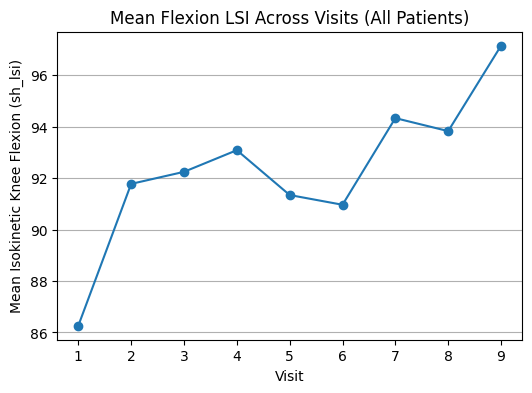

In [100]:
mean_lsi_f = data.groupby('redcap_event_name')['lsi_flex_isok_60'].mean().reset_index()

visit_order = ['visit_1_arm_1', 'visit_2_arm_1', 'visit_3_arm_1', 'visit_4_arm_1', 'visit_5_arm_1', 'visit_6_arm_1', 'visit_7_arm_1', 'visit_8_arm_1', 'visit_9_arm_1']
mean_lsi_f['redcap_event_name'] = pd.Categorical(
    mean_lsi_f['redcap_event_name'], 
    categories=visit_order, 
    ordered=True
)
mean_lsi_f = mean_lsi_f.sort_values('redcap_event_name')

visit_map = {
    'visit_1_arm_1': 1,
    'visit_2_arm_1': 2,
    'visit_3_arm_1': 3,
    'visit_4_arm_1': 4,
    'visit_5_arm_1': 5,
    'visit_6_arm_1': 6,
    'visit_7_arm_1': 7,
    'visit_8_arm_1': 8,
    'visit_9_arm_1': 9,
}

mean_lsi_f['visit_num'] = mean_lsi_f['redcap_event_name'].map(visit_map)
mean_lsi_f['visit_num'] = pd.to_numeric(mean_lsi_f['visit_num'], errors='coerce').astype('Int64')


# Plot
plt.figure(figsize=(6, 4))
plt.plot(mean_lsi_f['visit_num'].astype(str), mean_lsi_f['lsi_flex_isok_60'], marker='o')
plt.title('Mean Flexion LSI Across Visits (All Patients)')
plt.xlabel('Visit')
plt.ylabel('Mean Isokinetic Knee Flexion (sh_lsi)')
plt.grid(axis='y')

#plt.ylim(0, 2.5)

## Explore Relationships

#### Extension LSI and Sex

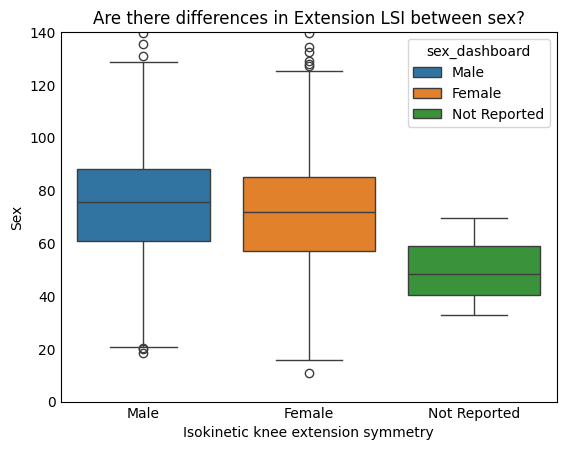

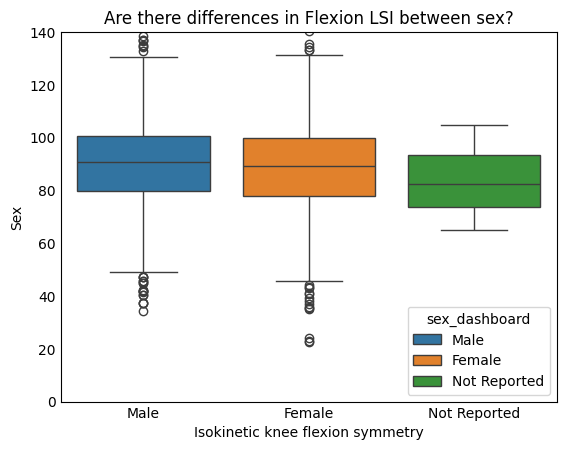

In [101]:
sns.boxplot(x='sex_dashboard', y='lsi_ext_isok_60', data=data, hue='sex_dashboard')
plt.title('Are there differences in Extension LSI between sex?')
plt.xlabel('Isokinetic knee extension symmetry')
plt.ylabel('Sex')
plt.tick_params(axis='y', which='both',length=0)
plt.tick_params(axis='x', which='both',length=0)
plt.ylim(0, 140)
plt.show()

sns.boxplot(x='sex_dashboard', y='lsi_flex_isok_60', data=data, hue='sex_dashboard')
plt.title('Are there differences in Flexion LSI between sex?')
plt.xlabel('Isokinetic knee flexion symmetry')
plt.ylabel('Sex')
plt.tick_params(axis='y', which='both',length=0)
plt.tick_params(axis='x', which='both',length=0)
plt.ylim(0, 140)
plt.show()

# We thought comparing some assessments/tests by sex might be meaningful due to 
# possible recovery differences
# After making boxplots grouped by sex for lsi, the sexes seem to perform more 
# similarly for flexion lsi than extension lsi. 
# For extension lsi, the percentiles and mean values for female are slightly lower than 
# male, though we're not sure how significant this is.

#### Single Hop LSI between Age Groups

(50.0, 130.0)

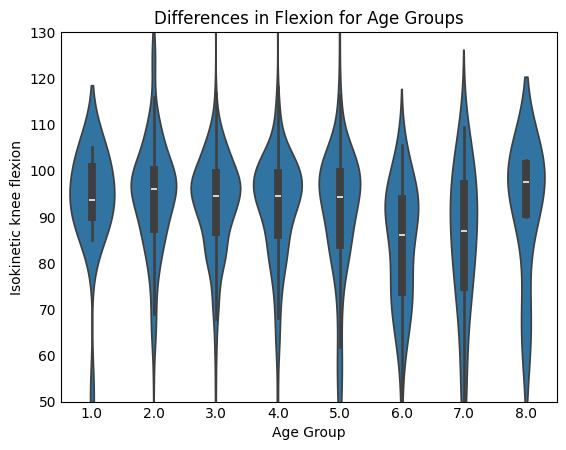

In [102]:
sns.violinplot(data=data, y='sh_lsi', x='age_group')
plt.title('Differences in Flexion for Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Isokinetic knee flexion')
plt.tick_params(axis='y', which='both',length=0)
plt.tick_params(axis='x', which='both',length=0)
plt.ylim(50, 130)

# It is important to note that the study has age groups, from younger to older
# As the ages increase, the single hop LSI decreases and then increases again

In [103]:
data.head()
data['sh_lsi'].groupby(data['age_group']).mean()

age_group
1.0    93.300229
2.0    93.969452
3.0    92.527524
4.0    91.753894
5.0    90.619473
6.0    83.350951
7.0    83.052291
8.0    91.734000
Name: sh_lsi, dtype: float64

We can see that the mean of single hop lsi per group somewhat decreases, where age groups 6 and 7 have the lowest symmetry.